# **Spatial models**

In [ ]:
conda install --channel conda-forge pysal
conda install -c conda-forge splot

In [79]:
from spreg import OLS
from spreg import MoranRes
from spreg import ML_Lag
from spreg import ML_Error
import pandas as pd
import numpy as np 
import geopandas           
import json 
from tqdm import tqdm
from multiprocessing.dummy import Pool
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry
from pysal.lib import weights
from splot.libpysal import plot_spatial_weights
import libpysal
from libpysal  import weights

In [103]:
upz=geopandas.read_file('upz.zip')
upz=upz.to_crs(epsg=4326)

- Crating a weights [matrix](https://geographicdata.science/book/notebooks/04_spatial_weights.html)

In [104]:
wq = weights.contiguity.Queen.from_dataframe(upz)


C:\Users\57320\Anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 44.
  warnings.warn(message)


In [105]:
wq.neighbors

{0: [1, 3, 4, 92, 95],
 1: [0, 2, 4],
 2: [8, 1, 4, 6],
 3: [0, 97, 4, 5, 7, 95],
 4: [0, 1, 2, 3, 5, 6],
 5: [3, 4, 6, 7],
 6: [2, 4, 5, 70, 7, 8, 9, 13, 59],
 7: [97, 98, 3, 68, 5, 6, 70, 59, 95],
 8: [9, 2, 10, 6],
 9: [6, 8, 10, 11, 13, 14, 15, 16],
 10: [8, 9, 11, 14],
 11: [17, 9, 10, 12, 14],
 12: [17, 20, 22, 11, 14],
 13: [16, 9, 59, 6],
 14: [17, 9, 10, 11, 12, 15],
 15: [16, 17, 18, 19, 9, 14],
 16: [18, 9, 59, 60, 13, 15],
 17: [19, 22, 23, 11, 12, 14, 15],
 18: [15, 16, 47, 19, 24, 25, 60, 62, 63],
 19: [17, 18, 23, 24, 15],
 20: [12, 21, 22],
 21: [20, 22, 23],
 22: [17, 20, 21, 23, 12],
 23: [48, 17, 19, 21, 22, 24],
 24: [48, 18, 19, 23, 47],
 25: [64, 18, 50, 53, 26, 63, 47],
 26: [50, 51, 52, 53, 55, 56, 25, 27, 28],
 27: [36, 56, 57, 26, 28, 111],
 28: [52, 30, 26, 27, 29, 110, 111],
 29: [52, 108, 28, 30, 31],
 30: [111, 28, 29, 31],
 31: [108, 29, 30, 111],
 32: [65, 34, 33, 54, 40, 41],
 33: [32, 34, 35, 54, 55],
 34: [32, 33, 40, 35],
 35: [33, 34, 36, 55, 56, 57

In [106]:
wq.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0

C:\Users\57320\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
C:\Users\57320\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

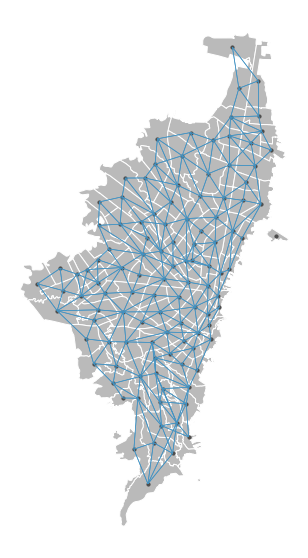

In [107]:
plot_spatial_weights(wq, upz)

- Weight matrix based in distancaes using KNN

In [108]:
wknn = weights.distance.KNN.from_dataframe(upz, k=4)

C:\Users\57320\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
C:\Users\57320\Anaconda3\envs\geo_env\lib\site-packages\splot\_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

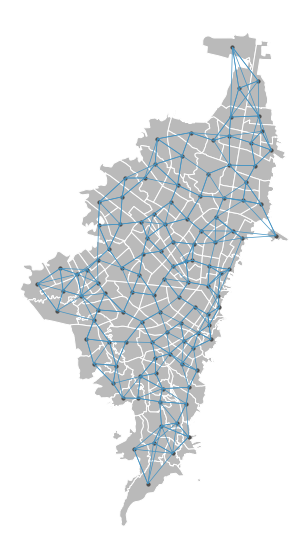

In [109]:
plot_spatial_weights(wknn, upz)

## Estimating SAR model 

In [112]:
df=pd.read_csv('clase.csv.gz',compression='gzip',header=0,sep=',',quotechar='"')
df=df[['id','lat','lon','price']]
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lon, df.lat))
df=df.set_crs(epsg=4326, inplace=True)

In [113]:
datal=geopandas.sjoin( df, upz, how="left", op="within")
datal=datal[datal['index_right'].isnull()==False]


In [114]:
datal.groupby('NOMBRE').agg({'price':'mean'})

,price
NOMBRE,
20 DE JULIO,7.578210e+08
AEROPUERTO EL DORADO,3.782700e+09
ALAMOS,6.361035e+08
ALFONSO LOPEZ,3.296953e+08
AMERICAS,3.632779e+08
...,...
USAQUEN,8.256801e+08
VENECIA,3.098351e+08
VERBENAL,3.235412e+08


In [115]:
datan=datal.groupby('NOMBRE').agg({'price':'mean'})
datin=upz.merge(datan, left_on='NOMBRE', right_on=datan.index,how='left')
datin=datin[['NOMBRE','geometry', 'price']]

In [116]:
lat=[4.61083]
lon=[-74.070278]
colp=pd.DataFrame({'lat':lat,'lon':lon})
colp = geopandas.GeoDataFrame(colp , geometry=geopandas.points_from_xy(colp.lon, colp.lat))
colp=colp.set_crs(epsg=4326, inplace=True)

In [117]:
colp=colp.to_crs(epsg=3310)
datin=datin.to_crs(epsg=3310)

In [119]:
datin['centriode']=datin.centroid

In [123]:
datin

,NOMBRE,geometry,price,centriode,dist
0,AEROPUERTO EL DORADO,"POLYGON ((5512896.173 -2185477.761, 5512896.13...",3.782700e+09,POINT (5515198.920 -2186336.139),12494.061711
1,FONTIBON SAN PABLO,"POLYGON ((5512371.881 -2187104.096, 5513046.20...",4.839227e+08,POINT (5513371.750 -2187751.251),13984.924661
2,ZONA FRANCA,"POLYGON ((5512012.514 -2188335.038, 5512108.96...",8.646414e+08,POINT (5514146.242 -2189418.578),13067.298400
3,CAPELLANIA,"POLYGON ((5517831.595 -2186531.325, 5517883.17...",8.242730e+08,POINT (5517811.059 -2187155.577),9757.467104
4,FONTIBON,"POLYGON ((5515232.953 -2187258.449, 5515357.09...",5.668474e+08,POINT (5516029.429 -2188326.958),11273.319083
...,...,...,...,...,...
107,SANTA BARBARA,"POLYGON ((5524646.611 -2180500.651, 5524716.93...",6.016063e+08,POINT (5526031.652 -2180957.731),8902.070027
108,MONTE BLANCO,"MULTIPOLYGON (((5524644.969 -2200703.758, 5524...",7.000000e+07,POINT (5525430.054 -2203289.368),13624.271494
109,EL TESORO,"MULTIPOLYGON (((5521563.561 -2200849.622, 5521...",6.537256e+08,POINT (5522584.923 -2200256.710),11450.060838
110,LA FLORA,"MULTIPOLYGON (((5528572.033 -2198759.199, 5528...",7.575094e+08,POINT (5529829.721 -2199884.967),10437.789273


In [121]:
dis=[]
for i in tqdm(datin.index):
    dis.append(colp.distance(datin['centriode'][i])[0])

100%|██████████| 112/112 [00:00<00:00, 8253.02it/s]


In [122]:
datin['dist']=dis

In [124]:
wq = weights.contiguity.Queen.from_dataframe(datin)
wknn = weights.distance.KNN.from_dataframe(datin, k=4)

C:\Users\57320\Anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 44.
  warnings.warn(message)


In [125]:
wq.transform = 'r'

('WARNING: ', 44, ' is an island (no neighbors)')


In [126]:
wknn.transform = 'r'

In [127]:
Y=datin['price'].values
x = np.array([datin.dist]).T

In [62]:
y_name = 'Precio promedio'
x_name = 'Distancia a la torre colpatria'

In [128]:
ols = OLS(y = Y, x = x, w = wknn, 
          name_y=y_name, name_x = [x_name], name_w="W", 
          white_test=True, spat_diag=True, moran=True)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :           W
Dependent Variable  :Precio promedio                Number of Observations:         112
Mean dependent var  :570218640.6611                Number of Variables   :           2
S.D. dependent var  :468023356.3094                Degrees of Freedom    :         110
R-squared           :      0.0004
Adjusted R-squared  :     -0.0087
Sum squared residual:24304751645152509952.000                F-statistic           :      0.0423
Sigma-square        :220952287683204640.000                Prob(F-statistic)     :      0.8375
S.E. of regression  :470055621.904                Log likelihood        :   -2394.369
Sigma-square ML     :217006711117433120.000                Akaike info criterion :    4792.737
S.E of regression ML:465839791.2560                Schwarz criterion     :    4798.174

-----------------------------------

In [129]:
ols = OLS(y = Y, x = x, w = wq, 
          name_y=y_name, name_x = [x_name], name_w="W", 
          white_test=True, spat_diag=True, moran=True)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :           W
Dependent Variable  :Precio promedio                Number of Observations:         112
Mean dependent var  :570218640.6611                Number of Variables   :           2
S.D. dependent var  :468023356.3094                Degrees of Freedom    :         110
R-squared           :      0.0004
Adjusted R-squared  :     -0.0087
Sum squared residual:24304751645152509952.000                F-statistic           :      0.0423
Sigma-square        :220952287683204640.000                Prob(F-statistic)     :      0.8375
S.E. of regression  :470055621.904                Log likelihood        :   -2394.369
Sigma-square ML     :217006711117433120.000                Akaike info criterion :    4792.737
S.E of regression ML:465839791.2560                Schwarz criterion     :    4798.174

-----------------------------------

## Validation approach

In [130]:
audi=pd.read_csv('audi.csv')
bmw=pd.read_csv('bmw.csv')
ford=pd.read_csv('ford.csv')
skoda=pd.read_csv('skoda.csv')
toyota=pd.read_csv('toyota.csv')

In [132]:
bmw['brand']='bmw'
audi['brand']='audi'
ford['brand']='ford'
skoda['brand']='skoda'
toyota['brand']='toyota'

In [133]:
data=pd.concat([ford,toyota,audi,bmw,skoda])

In [135]:
data['year']=data['year'].astype(str)
data['year']

0       2017
1       2018
2       2017
3       2019
4       2019
        ... 
6262    2014
6263    2014
6264    2017
6265    2016
6266    2017
Name: year, Length: 52419, dtype: object

In [136]:
dummies= pd.get_dummies(data[['model', 'year','transmission','fuelType','brand']])
data=data.drop(columns=['model', 'year','transmission','fuelType','brand'])
data = pd.concat([data, dummies], axis=1)

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['price']),data['price'], test_size=0.30,
                                                    random_state=200,
                                                    shuffle=True)

In [142]:
reg = LinearRegression().fit(x_train, y_train)

In [143]:
valorespre=reg.predict(x_test)

In [147]:
mse(y_test, reg.predict(x_test))

8824037.871800952